Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Accuracy: 0.9790209790209791
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
 [[90  0]
 [ 3 50]]


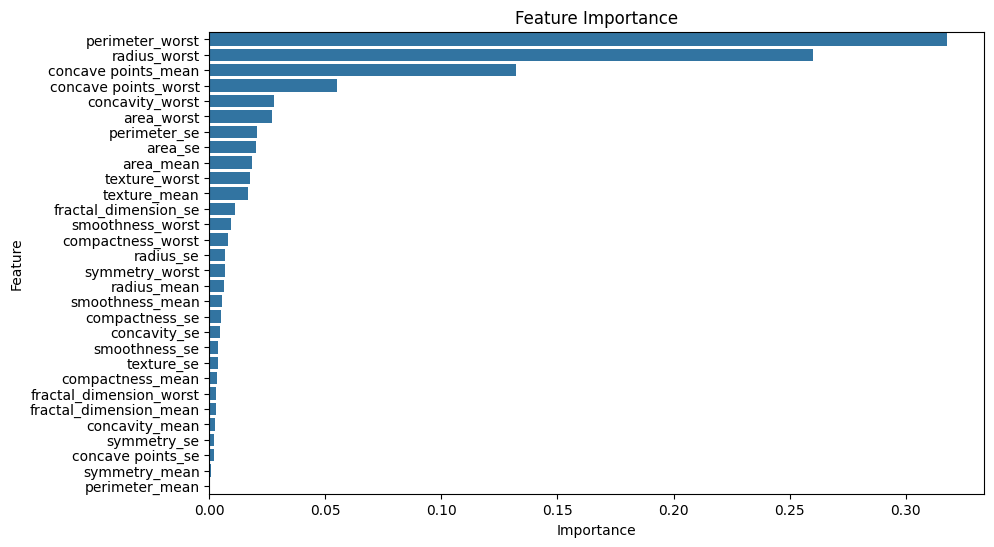

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/breast-cancer.csv')

# Data preprocessing
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)  # Drop ID column if present

# Encode the target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Define features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Instantiate XGBoost classifier directly
xgboost_classifier = xgb.XGBClassifier(eval_metric="logloss", random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Randomized search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgboost_classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predictions and evaluation
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()
